In [1]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

from deepsnap.hetero_graph import HeteroGraph

In [2]:
graph = pickle.load(open('../data/graphs/1_concepts_similar_llm_CHEAT.pkl', 'rb'))

In [46]:
hetero_graph = HeteroGraph(graph, netlib=nx)

In [47]:
hetero_graph['node_target']

1

In [45]:
hetero_graph

HeteroGraph(G=[], edge_index=[], edge_label_index=[], edge_to_graph_mapping=[], edge_to_tensor_mapping=[444806], edge_type=[], netlib=[], node_feature=[], node_label_index=[], node_to_graph_mapping=[], node_to_tensor_mapping=[41989], node_type=[], weight=[])

In [3]:
counts = []
# count the number of events with degree 0 in the nx graph
zero_degree_count = 0
for i, data in graph.nodes(data=True):
    if data['node_type'] == 'event':
        counts.append(data['node_target'])
        if graph.degree(i) == 0:
            zero_degree_count += 1

counts = np.array(counts)

In [4]:
nonzero_counts = counts[counts != -1]

In [5]:
print(f"Total events: {len(counts)}")
print(f"Total events with positive targets: {len(nonzero_counts)}")
print(f"Total events without edges: {zero_degree_count} ({zero_degree_count / len(counts) * 100:.2f}%)")

Total events: 60272
Total events with positive targets: 60272
Total events without edges: 0 (0.00%)


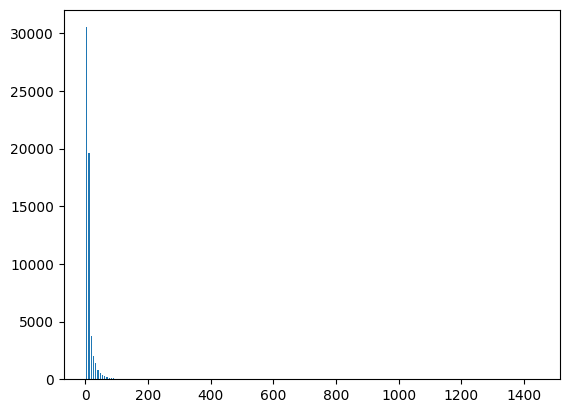

In [6]:
plt.hist(nonzero_counts, bins=200, rwidth=0.5)
plt.show()

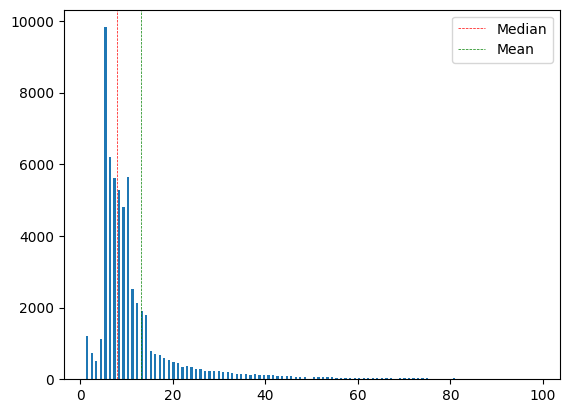

In [7]:
plt.hist(nonzero_counts[nonzero_counts < 100], bins=100, rwidth=0.5)
# draw the median line
plt.axvline(np.median(nonzero_counts), color='r', linestyle='dashed', linewidth=0.5)
# draw the mean line
plt.axvline(np.mean(nonzero_counts), color='g', linestyle='dashed', linewidth=0.5)

# add the legend
plt.legend({'Median': np.median(nonzero_counts), 'Mean': np.mean(nonzero_counts)})

plt.show()

In [8]:
np.mean(nonzero_counts)

13.09696

In [9]:
np.median(nonzero_counts)

8.0

In [39]:
np.max(nonzero_counts)

607.0

In [11]:
# find nodes with degree 0
zero_degree_nodes = []
for i, data in graph.nodes(data=True):
    if data['node_type'] == 'event' and graph.degree(i) == 0:
        zero_degree_nodes.append(i)

In [12]:
len(zero_degree_nodes)

0

In [13]:
zero_degree_nodes

[]

In [17]:
graph_undirected = graph.to_undirected()

In [18]:
# find the number of components in the graph
nx.number_connected_components(graph_undirected)

4